In [1]:
import numpy as np
import time
import pandas as pd
import math

np.random.seed(seed=42)

In [2]:
def int_to_sci(x):
    s = str(x)
    exp = len(s)-1
    s = x/10**exp
    s=str(s)[0:4]
    return s+'*10^'+str(exp)
    
print(int_to_sci(123456))
1.23456*10**5

1.23*10^5


123456.00000000001

In [3]:
def fact_by_for(x):
    fact = 1
    for i in range(x,1,-1):
        fact *=i
    return fact
c = fact_by_for(500)
int_to_sci(c)

'1.22*10^1134'

In [4]:
def fact_by_rec(x):
    x=int(x)
    if x == 1:
        return 1
    else:
        return x*fact_by_rec(x-1)
c = fact_by_rec(500)
int_to_sci(c)

'1.22*10^1134'

In [5]:
timer = pd.DataFrame(columns=['number', 'rec_res','rec_time', 'rec_time_per', 'for_res','for_time', 'for_time_per', 'diff_time', 'diff_time_per'])

a = np.random.randint(100,500,10)

for i in a:
    
    timer_array=[]
    
    timer_array.append(i)

    start_rec = time.time()
    res_rec = fact_by_rec(i)
    end_rec = time.time()
    time_rec = end_rec-start_rec
    timer_array.append(int_to_sci(res_rec))
    timer_array.append(time_rec)
    time_rec_per = time_rec/i
    timer_array.append(time_rec_per)

    start_for = time.time()
    res_for = fact_by_for(i)
    end_for = time.time()
    time_for = end_for-start_for
    timer_array.append(int_to_sci(res_for))
    timer_array.append(time_for)
    time_for_per = time_for/i
    timer_array.append(time_for_per)
    
    time_diff = abs(time_rec-time_for)
    timer_array.append(time_diff)
    time_diff_per = time_diff/i
    timer_array.append(time_diff_per)
    
    r = pd.Series(timer_array, index=timer.columns)
    timer = timer.append(r, ignore_index=True)

In [6]:
timer

,number,rec_res,rec_time,rec_time_per,for_res,for_time,for_time_per,diff_time,diff_time_per
0,202,3.20*10^379,0.000210,1.039835e-06,3.20*10^379,0.000026,1.286516e-07,0.000184,9.111839e-07
1,448,8.57*10^994,0.000299,6.673591e-07,8.57*10^994,0.000071,1.585909e-07,0.000228,5.087682e-07
2,370,1.69*10^791,0.000158,4.272203e-07,1.69*10^791,0.000055,1.488505e-07,0.000103,2.783698e-07
3,206,5.59*10^388,0.000079,3.842474e-07,5.59*10^388,0.000025,1.215240e-07,0.000054,2.627234e-07
4,171,1.24*10^309,0.000062,3.625078e-07,1.24*10^309,0.000019,1.115409e-07,0.000043,2.509669e-07
5,288,7.19*10^584,0.000118,4.097819e-07,7.19*10^584,0.000038,1.316269e-07,0.000080,2.781550e-07
6,120,6.68*10^198,0.000043,3.596147e-07,6.68*10^198,0.000013,1.092752e-07,0.000030,2.503395e-07
7,202,3.20*10^379,0.000070,3.481855e-07,3.20*10^379,0.000024,1.192093e-07,0.000046,2.289763e-07
8,221,5.04*10^423,0.000073,3.301180e-07,5.04*10^423,0.000025,1.132758e-07,0.000048,2.168422e-07
9,314,2.06*10^649,0.000110,3.500349e-07,2.06*10^649,0.000039,1.237651e-07,0.000071,2.262699e-07


In [7]:
timer['ratio_per'] = timer.rec_time_per/timer.for_time_per

In [8]:
timer = timer.set_index('number')

In [9]:
timer = timer.sort_index()
timer

,rec_res,rec_time,rec_time_per,for_res,for_time,for_time_per,diff_time,diff_time_per,ratio_per
number,,,,,,,,,
120,6.68*10^198,0.000043,3.596147e-07,6.68*10^198,0.000013,1.092752e-07,0.000030,2.503395e-07,3.290909
171,1.24*10^309,0.000062,3.625078e-07,1.24*10^309,0.000019,1.115409e-07,0.000043,2.509669e-07,3.250000
202,3.20*10^379,0.000210,1.039835e-06,3.20*10^379,0.000026,1.286516e-07,0.000184,9.111839e-07,8.082569
202,3.20*10^379,0.000070,3.481855e-07,3.20*10^379,0.000024,1.192093e-07,0.000046,2.289763e-07,2.920792
206,5.59*10^388,0.000079,3.842474e-07,5.59*10^388,0.000025,1.215240e-07,0.000054,2.627234e-07,3.161905
221,5.04*10^423,0.000073,3.301180e-07,5.04*10^423,0.000025,1.132758e-07,0.000048,2.168422e-07,2.914286
288,7.19*10^584,0.000118,4.097819e-07,7.19*10^584,0.000038,1.316269e-07,0.000080,2.781550e-07,3.113208
314,2.06*10^649,0.000110,3.500349e-07,2.06*10^649,0.000039,1.237651e-07,0.000071,2.262699e-07,2.828221
370,1.69*10^791,0.000158,4.272203e-07,1.69*10^791,0.000055,1.488505e-07,0.000103,2.783698e-07,2.870130


In [10]:
timer_totals = timer.loc[:,['rec_time','for_time', 'diff_time']]
timer_totals

,rec_time,for_time,diff_time
number,,,
120,0.000043,0.000013,0.000030
171,0.000062,0.000019,0.000043
202,0.000210,0.000026,0.000184
202,0.000070,0.000024,0.000046
206,0.000079,0.000025,0.000054
221,0.000073,0.000025,0.000048
288,0.000118,0.000038,0.000080
314,0.000110,0.000039,0.000071
370,0.000158,0.000055,0.000103


In [11]:
timer_totals.plot.bar(title = 'Plot 1: \nTotal time to calculate n! where n = number on x-axis')

In [12]:
timer_per = timer.loc[:,['rec_time_per','for_time_per', 'diff_time_per']]
timer_per

,rec_time_per,for_time_per,diff_time_per
number,,,
120,3.596147e-07,1.092752e-07,2.503395e-07
171,3.625078e-07,1.115409e-07,2.509669e-07
202,1.039835e-06,1.286516e-07,9.111839e-07
202,3.481855e-07,1.192093e-07,2.289763e-07
206,3.842474e-07,1.215240e-07,2.627234e-07
221,3.301180e-07,1.132758e-07,2.168422e-07
288,4.097819e-07,1.316269e-07,2.781550e-07
314,3.500349e-07,1.237651e-07,2.262699e-07
370,4.272203e-07,1.488505e-07,2.783698e-07


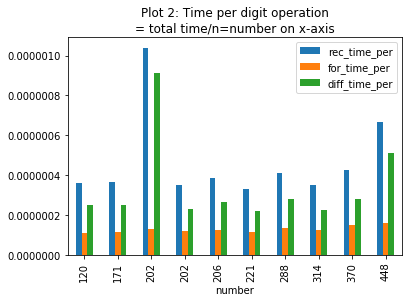

In [13]:
timer_per.plot.bar(title = 'Plot 2: Time per digit operation\n= total time/n=number on x-axis')

In [14]:
timer_ratio_per = timer.ratio_per
#timer_ratio_per = pd.DataFrame(data=timer_ratio_per, columns=['rec/for per operation'])
timer_ratio_per

number
120    3.290909
171    3.250000
202    8.082569
202    2.920792
206    3.161905
221    2.914286
288    3.113208
314    2.828221
370    2.870130
448    4.208054
Name: ratio_per, dtype: float64

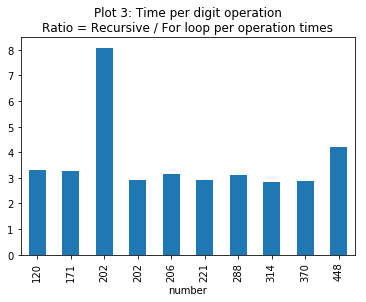

In [15]:
timer_ratio_per.plot.bar(title = 'Plot 3: Time per digit operation\nRatio = Recursive / For loop per operation times')